In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [2]:
#Importing Dataset
forest_data = pd.read_csv('F:/Data Science Assignments/Neural Networks/forestfires.csv')
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
fdata=forest_data.copy()

In [4]:
fdata.drop(labels=['month','day'],axis=1,inplace=True)

In [5]:
mapping = {'small': 1, 'large': 2}

In [6]:
fdata=fdata.replace(mapping)

In [7]:
fdata.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
fdata.describe(include='all')

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,1.268859
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


C:\Users\rudra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


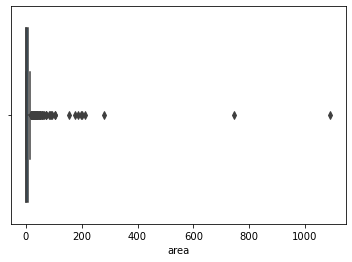

In [9]:
outliers = sns.boxplot(fdata['area'])

In [10]:
#we can clearly conclude there are 3 outliers from given dataset

In [11]:
plt.rcParams['figure.figsize'] = 7,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


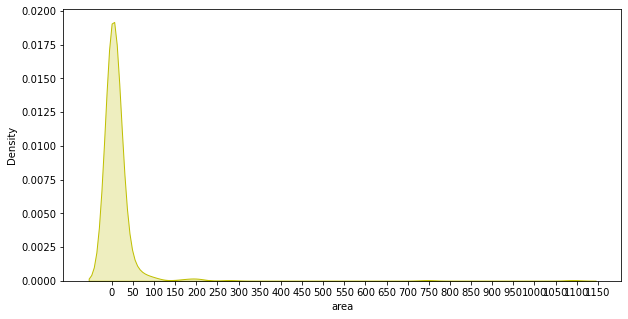

In [12]:
plt.figure(figsize=(10,5))
print("Skew: {}".format(fdata['area'].skew()))
print("Kurtosis: {}".format(fdata['area'].kurtosis()))
ax = sns.kdeplot(fdata['area'],shade=True,color='y')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [13]:
#from the above we can see most of the area is under 100 
#Finding Correlation
corr = fdata[fdata.columns[0:11]].corr()

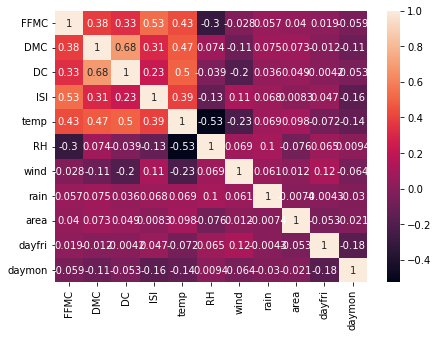

In [14]:
sns.heatmap(corr,annot=True)
plt.show()

In [15]:
#now lets do Data Preparation


In [16]:
import numpy as np

In [17]:
X=np.array(fdata.drop(labels='size_category',axis=1))

In [18]:
X

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [19]:
y=np.array(fdata['size_category'])

In [20]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
X_norm = norm_func(X)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer

In [25]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                348       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Architecture Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=300, batch_size=10)

Epoch 1/300
42/42 [==============================] - 6s 7ms/step - loss: 0.4911 - accuracy: 0.7312
Epoch 2/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2122 - accuracy: 0.7312
Epoch 3/300
42/42 [==============================] - 0s 6ms/step - loss: -0.1425 - accuracy: 0.7312
Epoch 4/300
42/42 [==============================] - 0s 6ms/step - loss: -0.5314 - accuracy: 0.7312
Epoch 5/300
42/42 [==============================] - 0s 6ms/step - loss: -0.9382 - accuracy: 0.7312
Epoch 6/300
42/42 [==============================] - 0s 6ms/step - loss: -1.4043 - accuracy: 0.7312
Epoch 7/300
42/42 [==============================] - 0s 6ms/step - loss: -2.0163 - accuracy: 0.7312
Epoch 8/300
42/42 [==============================] - 0s 6ms/step - loss: -2.8309 - accuracy: 0.7312
Epoch 9/300
42/42 [==============================] - 0s 6ms/step - loss: -3.8957 - accuracy: 0.7312
Epoch 10/300
42/42 [==============================] - 0s 6ms/step - loss: -5.2815 - accuracy: 0.7312
E

In [29]:
result = model.evaluate(x=x_test,y=y_test)
result

4/4 [==============================] - 1s 15ms/step - loss: -55187.1211 - accuracy: 0.7308


[-55187.12109375, 0.7307692170143127]

In [30]:
print('Model Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model Accuracy :  0.73
Loss           :  -55187.12
